# Oasis Infobyte Data Science Task-5
## Sales Prediction

#### Anvay Tere- DJ Sanghvi (Mumbai University)

##### Importing the various modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



##### Data Loading

In [2]:
os.chdir("D:\\Datasets")

In [3]:
pred = pd.read_csv('sales.csv')


##### Preprocessing of Data

In [4]:
pred.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
remove_cols = [col for col in pred.columns if 'Unnamed' in col]
pred.drop(remove_cols , axis='columns', inplace = True)

In [6]:
pred.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


##### Data Analysis

In [7]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
pred.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
pred.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


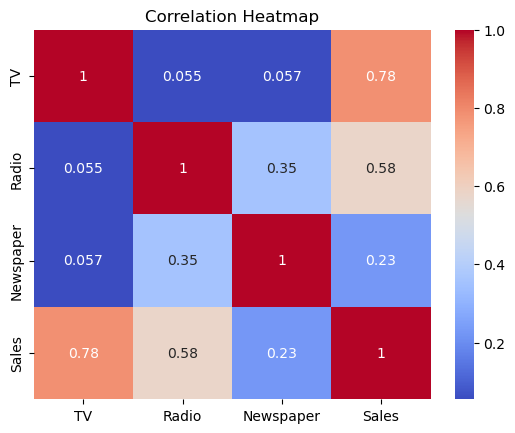

In [10]:
corr_matrix = pred[['TV','Radio','Newspaper','Sales']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap');

<Axes: xlabel='TV', ylabel='Sales'>

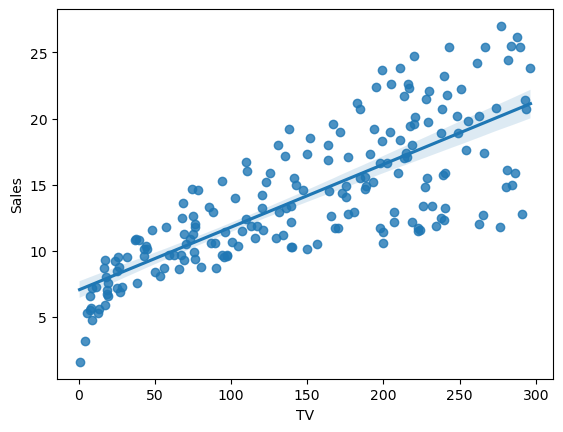

In [11]:
sns.regplot( x= 'TV', y='Sales', data=pred)

<Axes: xlabel='Radio', ylabel='Sales'>

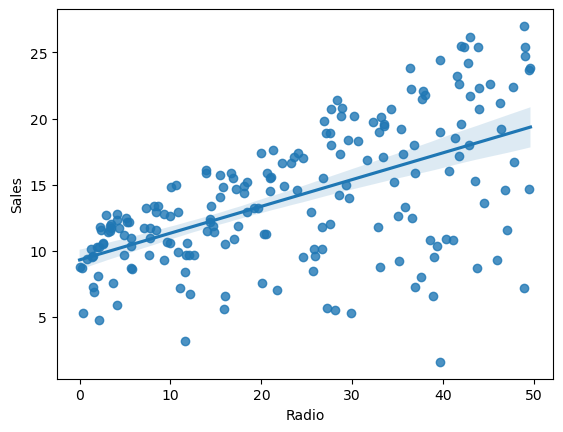

In [12]:
sns.regplot(x='Radio', y='Sales', data=pred)

<Axes: xlabel='Newspaper', ylabel='Sales'>

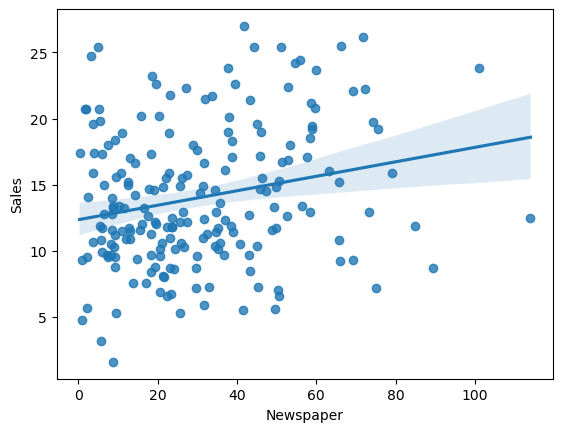

In [13]:
sns.regplot(x='Newspaper', y='Sales', data=pred)

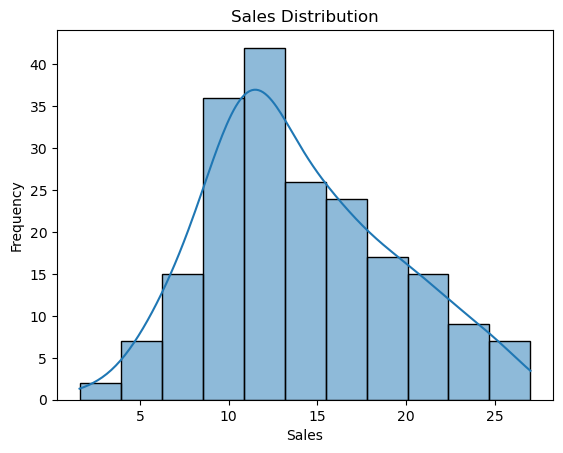

In [14]:
sns.histplot(pred['Sales'], kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency');

##### Trainning of the model

In [15]:
X = pred.drop(["Sales"], axis=1)
y = pred["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [17]:
linear_reg = LinearRegression()
tree_reg = DecisionTreeRegressor()
forest_reg = RandomForestRegressor()


In [18]:
linear_reg.fit(X_train , y_train)
tree_reg.fit(X_train , y_train)
forest_reg.fit(X_train , y_train)

RandomForestRegressor()

##### Evaluation of the various models

In [19]:
linear_reg_predictions = linear_reg.predict(X_test)
decision_tree_predictions = tree_reg.predict(X_test)
random_forest_predictions = forest_reg.predict(X_test)

In [20]:
print("Accuracy of Linear Regression is = " ,linear_reg.score(X_test, y_test)*100)
print("Accuracy of Tree Regression is = " ,tree_reg.score(X_test, y_test)*100)
print("Accuracy of Random Forest Regression is = " ,forest_reg.score(X_test, y_test)*100)

Accuracy of Linear Regression is =  86.09466508230368
Accuracy of Tree Regression is =  94.25676923278823
Accuracy of Random Forest Regression is =  98.28994867472005


In [21]:
linear_reg_predictions = linear_reg.predict(X_test)
decision_tree_predictions = tree_reg.predict(X_test)
random_forest_predictions = forest_reg.predict(X_test)

In [22]:
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)

print("Mean Square Error of Linear Regression is :", linear_reg_mse)
print("Mean Square Error of Decision Tree is :", decision_tree_mse)
print("Mean Square Error of Random Forest is :", random_forest_mse)

Mean Square Error of Linear Regression is : 3.796797236715219
Mean Square Error of Decision Tree is : 1.5681666666666678
Mean Square Error of Random Forest is : 0.466922816666666


In [23]:
r2_linear_reg = r2_score(y_test, linear_reg_predictions)
r2_tree_reg = r2_score(y_test, decision_tree_predictions)
r2_forest_reg = r2_score(y_test, random_forest_predictions)

print("r2 score of Linear Regression is :", r2_linear_reg)
print("r2 score of Decision Tree is:", r2_tree_reg)
print("r2 score of Random Forest is :", r2_forest_reg)

r2 score of Linear Regression is : 0.8609466508230368
r2 score of Decision Tree is: 0.9425676923278823
r2 score of Random Forest is : 0.9828994867472005


##### Comparison of the variou models

In [24]:
name_model = ["Linear Regression", "Decision Tree", "Random Forest"]
mse_scores  = [linear_reg_mse, decision_tree_mse, random_forest_mse]
r2_scores = [r2_linear_reg, r2_tree_reg, r2_forest_reg]

results_df = pd.DataFrame({'Model': name_model , 'MSE': mse_scores, 'R-squared': r2_scores})

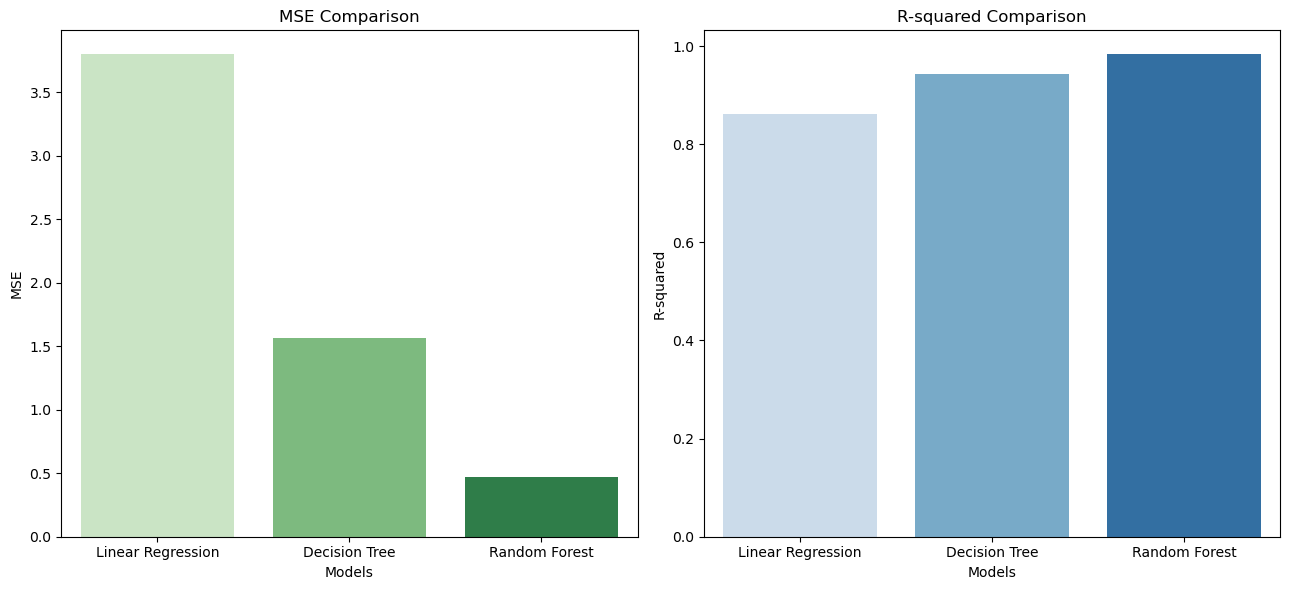

In [25]:
plt.figure(figsize=(13, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=results_df, x='Model', y='MSE', palette='Greens')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE Comparison')

plt.subplot(1, 2, 2)
sns.barplot(data=results_df, x='Model', y='R-squared', palette='Blues')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared Comparison')

plt.tight_layout();

In [26]:
compares = pd.DataFrame({
    "Total_Sales": y_test,
    "Linear_Regression_Predictions": linear_reg_predictions,
    "Decision_Tree_Predictions": decision_tree_predictions,
    "Random_Forest_Predictions": random_forest_predictions
})

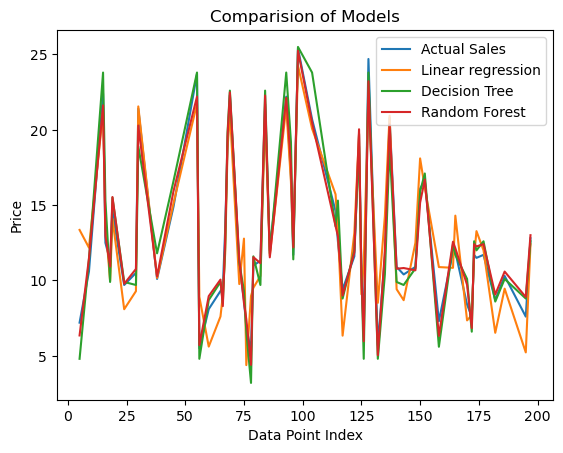

In [27]:
sns.lineplot(data=compares, x=compares.index, y="Total_Sales", label="Actual Sales")
sns.lineplot(data=compares, x=compares.index, y="Linear_Regression_Predictions", label="Linear regression")
sns.lineplot(data=compares, x=compares.index, y="Decision_Tree_Predictions", label="Decision Tree")
sns.lineplot(data=compares, x=compares.index, y="Random_Forest_Predictions", label="Random Forest")

plt.title("Comparision of Models")
plt.xlabel("Data Point Index")
plt.ylabel("Price")
plt.legend();

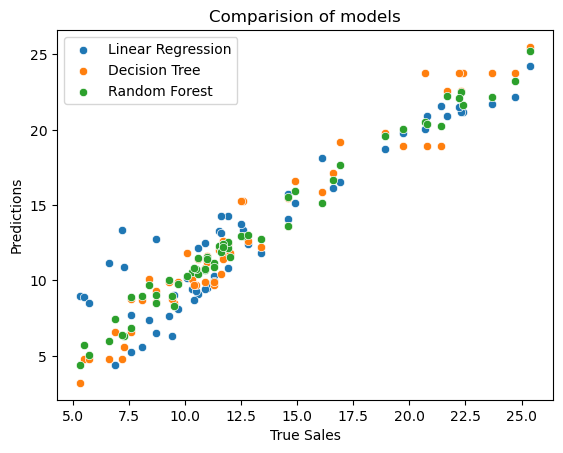

In [28]:
sns.scatterplot(data=compares, x="Total_Sales", y="Linear_Regression_Predictions", label="Linear Regression")
sns.scatterplot(data=compares, x="Total_Sales", y="Decision_Tree_Predictions", label="Decision Tree")
sns.scatterplot(data=compares, x="Total_Sales", y="Random_Forest_Predictions", label="Random Forest")

plt.title("Comparision of models")
plt.xlabel("True Sales")
plt.ylabel("Predictions")
plt.legend();

### Concluscion
     
     

In this project We Built a model to predict the sales of a particular model throught various sites like Telivision , Newspaper and Radio.
First we imported the data set and did some basic analysis on it to find the corelation present between them . We made of use of Regression models 
like Random Forest , Linear regression and Tree Regression . After the analysis we found that The accuracy of The random forest Regression model  proved to be the highest . We used score , R2 and mean Squared error to compare between these 3 models .

Overall this  project helped to enhance my data science skills and was a very good learning experience for me.